Sphere 函数最优解: [-1.34833947e-17 -5.67851514e-17 -9.62086091e-17]
Sphere 函数最优值: 1.2662451815066056e-32
Rastrigin 函数最优解: [ 3.12630024e-10  8.12222727e-10 -1.87593706e-09]
Rastrigin 函数最优值: 0.0


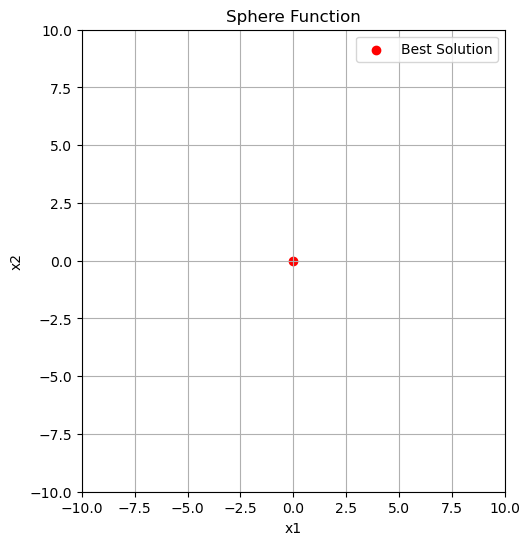

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
# WOA 经典算法
class WOA:
    def __init__(self, func, dim, bounds, max_iter, population_size=30):
        """
        :param func: 目标函数
        :param dim: 维度
        :param bounds: (lower_bound, upper_bound)
        :param max_iter: 最大迭代次数
        :param population_size: 种群大小
        """
        self.func = func
        self.dim = dim
        self.lb, self.ub = bounds
        self.max_iter = max_iter
        self.population_size = population_size
        
        
        # WOA 中的参数
        self.a = 2.0             # 初始 a (线性递减)
        self.a_decay = 2.0 / self.max_iter
        self.b = 1.0             # 螺旋形常数
        self.l_bound = self.lb   # 搜索空间下界
        self.u_bound = self.ub   # 搜索空间上界
        
        # 初始化种群
        self.population = self.initialize_population()
        
        # 记录最优解
        self.best_solution = None
        self.best_fitness = float('inf')
        
        # 更新初始最优解
        self.update_best()

    def initialize_population(self):
        """Initialize the whales population Xi (i = 1, 2, ..., n)"""
        # 初始化种群位置
        pop = np.random.uniform(self.lb, self.ub, (self.population_size, self.dim))
        return pop
        
    def fitness(self, solution:np.ndarray) -> float:
        """Calculate the fitness of each search agent"""
        # 目标函数值
        return self.func(solution)

    def update_best(self):
        """Update the best solution"""
        # 找到当前种群中最好的解
        for i in range(self.population_size):
            fitness_value = self.fitness(self.population[i])
            if fitness_value < self.best_fitness:
                self.best_fitness = fitness_value
                self.best_solution = self.population[i].copy()
                
    def boundary_check(self, x: np.ndarray) -> np.ndarray:
        """边界检查，如果超出搜索空间则截断到边界"""
        # clip(x, self.lb, self.ub) 将 x 限制在 [lb, ub] 范围内
        x = np.clip(x, self.lb, self.ub)
        return x
        
    def run(self):
        iteration = 0
        while iteration < self.max_iter:
            # a 在 2 -> 0 线性递减
            a = self.a - iteration * self.a_decay
            
            # 遍历每只鲸鱼
            for i in range(self.population_size):
                # 计算当前鲸鱼适应度
                current_fitness = self.fitness(self.population[i])
                
                # 更新全局最优解
                if current_fitness < self.best_fitness:
                    self.best_fitness = current_fitness
                    self.best_solution = self.population[i].copy()
                
                p = np.random.rand()

                l = (np.random.rand(self.dim) * 2 - 1)

                r = np.random.rand(self.dim)
                A = 2.0 * a * r - a
                C = 2.0 * r

                # 开始根据 WOA 公式更新位置
                if p < 0.5:
                    if np.abs(A).max() < 1:
                        # 收缩包围 (exploitation)
                        # 公式 (2.1): X(t+1) = X*(t) - A·|C·X*(t) - X(t)|
                        D = np.abs(C * self.best_solution - self.population[i])
                        new_position = self.best_solution - A * D
                    else:
                        # 搜索阶段 (exploration)
                        # 公式 (2.8): X_rand 代替 X*(t)
                        rand_whale_index = np.random.randint(self.population_size)
                        X_rand = self.population[rand_whale_index]
                        D = np.abs(C * X_rand - self.population[i])
                        new_position = X_rand - A * D
                else:
                    # 螺旋更新 (exploitation)
                    # 公式 (2.5): X(t+1) = D' * e^(b*l) * cos(2πl) + X*(t)
                    # 其中 D' = |X*(t) - X(t)|
                    D_prime = np.abs(self.best_solution - self.population[i])
                    new_position = (D_prime * np.exp(self.b * l) * 
                                    np.cos(2.0 * np.pi * l) 
                                    + self.best_solution)

                # 边界检查
                new_position = self.boundary_check(new_position)

                # 更新该鲸鱼位置
                self.population[i] = new_position

            # 迭代结束后，更新种群最好解
            self.update_best()
            
            iteration += 1
        
        # 返回最优解和最优值
        return self.best_solution, self.best_fitness
            
if __name__ == "__main__":
    # 目标函数，这里用简单的 x^2 求和
    def sphere(x):
        return np.sum(x**2)

    def rastrigin(x):
        n = len(x)
        A = 10
        return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))
    
    # 参数设置
    dim = 3
    bounds = (-10, 10)
    bounds_for_rastrigin = (-5.12, 5.12)  # Rastrigin 函数的边界
    max_iter = 100
    population_size = 30

    woa = WOA(func=sphere, dim=dim, bounds=bounds, max_iter=max_iter, population_size=population_size)
    woa_rastrigin = WOA(func=rastrigin, dim=dim, bounds=bounds_for_rastrigin, max_iter=max_iter, population_size=population_size)
    best_sol, best_fit = woa.run()

    best_sol_rastrigin, best_fit_rastrigin = woa_rastrigin.run()
    print("Sphere 函数最优解:", best_sol)
    print("Sphere 函数最优值:", best_fit)
    print("Rastrigin 函数最优解:", best_sol_rastrigin)
    print("Rastrigin 函数最优值:", best_fit_rastrigin)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Sphere Function")
    plt.scatter(best_sol[0], best_sol[1], color='r', label='Best Solution')
    plt.xlim(bounds)
    plt.ylim(bounds)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid()
    
    
    
    
        